Chapter 19
# 基于相关性系数矩阵创建的无向图
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from networkx.algorithms.community.centrality import girvan_newman

In [2]:
df = pd.read_pickle('stock_levels_df_2020.pkl')

In [3]:
df.head(5)

Adj Close                                               \
                             A        AAL         AAP       AAPL       ABBV   
Date                                                                          
2020-01-02 00:00:00  83.637688  28.982893  146.634369  73.059425  74.197632   
2020-01-03 00:00:00  82.294807  27.548195  146.643570  72.349144  73.493347   
2020-01-06 00:00:00  82.538071  27.219410  144.233551  72.925629  74.073334   
2020-01-07 00:00:00  82.791092  27.119778  142.522629  72.582649  73.650787   
2020-01-08 00:00:00  83.608505  27.737495  140.885269  73.750259  74.172783   

                                                                        ...  \
                    ABC        ABT         ACN        ADBE         ADI  ...   
Date                                                                    ...   
2020-01-02 00:00:00 NaN  80.889481  197.680649  334.429993  111.776886  ...   
2020-01-03 00:00:00 NaN  79.903351  197.351425  331.809998  109.809204  ...   
2020-01-06 00:00:00 NaN  80.322006  196.062698  333.709991  108.519081  ...   
2020-01-07 00:00:00 NaN  79.875465  191.829758  333.390015  110.987968  ...   
2020-01-08 00:00:00 NaN  80.201057  192.206024  337.869995  111.990349  ...   

                    Volume                                                     \
                        XL XLNX       XOM     XRAY      XRX      XYL      YUM   
Date                                                                            
2020-01-02 00:00:00    NaN  NaN  12456400  1556600  1581300   869500  1369900   
2020-01-03 00:00:00    NaN  NaN  17386900   910000  1042600   795100  1145500   
2020-01-06 00:00:00    NaN  NaN  20081900   751000  1199200   817300  1454100   
2020-01-07 00:00:00    NaN  NaN  17387700   792600  1533100   662200  1388600   
2020-01-08 00:00:00    NaN  NaN  15137700  1001500  1345400  1083200  1521500   

                                                
                         ZBH     ZION      ZTS  
Date                                            
2020-01-02 00:00:00  1083972  1528700  1576700  
2020-01-03 00:00:00   992405  1215800  1274000  
2020-01-06 00:00:00   972423  1217500  2334100  
2020-01-07 00:00:00   934519  1450900  1224500  
2020-01-08 00:00:00   936064  2396000  1766700  

[5 rows x 3030 columns]

In [4]:
# 计算日收益率
returns_df = df['Adj Close'].pct_change()

In [5]:
# 整列、整行都为NaN的删除
returns_df.dropna(axis = 1,how='all', inplace = True)
returns_df.dropna(axis = 0,how='all', inplace = True)
returns_df

,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.016056,-0.049502,0.000063,-0.009722,-0.009492,-0.012191,-0.001665,-0.007834,-0.017604,-0.001952,...,-0.014833,0.004809,-0.008039,-0.011066,-0.012998,0.005886,-0.003132,-0.002614,-0.014112,0.000149
2020-01-06,0.002956,-0.011935,-0.016435,0.007968,0.007892,0.005240,-0.006530,0.005726,-0.011749,-0.007823,...,-0.001979,-0.001436,0.007678,0.005506,-0.015089,-0.006474,-0.000589,-0.005779,-0.012186,-0.007677
2020-01-07,0.003066,-0.003660,-0.011862,-0.004703,-0.005704,-0.005559,-0.021590,-0.000959,0.022751,-0.012046,...,0.004746,-0.002077,-0.008184,0.005299,0.001393,-0.003760,0.001769,-0.000879,-0.006070,0.003380
2020-01-08,0.009873,0.022777,-0.011488,0.016087,0.007087,0.004076,0.001961,0.013438,0.009031,-0.011084,...,0.006274,-0.000961,-0.015080,0.010543,-0.000556,0.003396,0.001765,0.011974,0.009850,-0.002171
2020-01-09,0.015712,0.003951,-0.001893,0.021240,0.007708,0.002668,0.008907,0.007636,0.000000,-0.010312,...,-0.004203,0.002244,0.007656,0.000695,0.018647,0.004513,0.007930,-0.006618,0.006633,0.013279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.000596,0.026486,-0.000690,-0.006976,0.004669,-0.007665,-0.007824,-0.014400,-0.007347,0.012723,...,0.023888,-0.008021,0.012852,-0.001934,0.017873,0.003320,-0.005680,-0.012266,0.034967,-0.012235
2020-12-24,0.000085,-0.014475,0.008726,0.007712,-0.000194,0.008376,-0.000544,0.005937,0.008728,0.001824,...,-0.007892,0.004976,-0.004070,0.004069,-0.008780,0.005214,0.007023,0.003429,-0.003907,0.005443
2020-12-28,0.004433,0.025543,-0.011700,0.035766,0.001840,-0.005168,0.009250,-0.001820,0.001454,0.005259,...,0.009441,0.010676,0.003365,0.009456,0.031001,0.001197,0.020829,-0.002412,0.000461,0.010391


In [6]:
# 计算相关性系数矩阵
corr = returns_df.corr() 
corr

,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,1.000000,0.342831,0.517041,0.672325,0.617004,0.717675,0.723452,0.664375,0.667762,0.644773,...,0.451122,0.608563,0.563361,0.514114,0.516835,0.677113,0.500376,0.508869,0.454512,0.721486
AAL,0.342831,1.000000,0.386394,0.247031,0.224777,0.186671,0.366111,0.138796,0.340625,0.525709,...,0.576481,0.210385,0.548446,0.454399,0.539316,0.487047,0.472990,0.508783,0.561756,0.257232
AAP,0.517041,0.386394,1.000000,0.514677,0.500066,0.477866,0.581806,0.505202,0.599346,0.621216,...,0.547399,0.627185,0.507816,0.539484,0.591081,0.632117,0.601901,0.469041,0.464498,0.588932
AAPL,0.672325,0.247031,0.514677,1.000000,0.534245,0.631776,0.684914,0.765803,0.663755,0.584216,...,0.396276,0.591176,0.454424,0.380186,0.480186,0.556827,0.513846,0.437565,0.325975,0.694627
ABBV,0.617004,0.224777,0.500066,0.534245,1.000000,0.623430,0.622000,0.541123,0.513376,0.492994,...,0.371624,0.496596,0.479258,0.544228,0.443353,0.509726,0.472484,0.477231,0.363803,0.649789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.677113,0.487047,0.632117,0.556827,0.509726,0.597313,0.691974,0.471406,0.669811,0.769949,...,0.527209,0.672955,0.670996,0.607394,0.673643,1.000000,0.603254,0.580887,0.647081,0.619019
YUM,0.500376,0.472990,0.601901,0.513846,0.472484,0.497004,0.645687,0.384305,0.564940,0.605213,...,0.584140,0.536227,0.575154,0.594284,0.623298,0.603254,1.000000,0.664224,0.469437,0.642182
ZBH,0.508869,0.508783,0.469041,0.437565,0.477231,0.424978,0.639994,0.353267,0.552540,0.600744,...,0.654368,0.374928,0.658157,0.690635,0.724724,0.580887,0.664224,1.000000,0.595902,0.558262
ZION,0.454512,0.561756,0.464498,0.325975,0.363803,0.315428,0.525917,0.212341,0.475398,0.652794,...,0.650666,0.400493,0.728424,0.672136,0.668353,0.647081,0.469437,0.595902,1.000000,0.331462


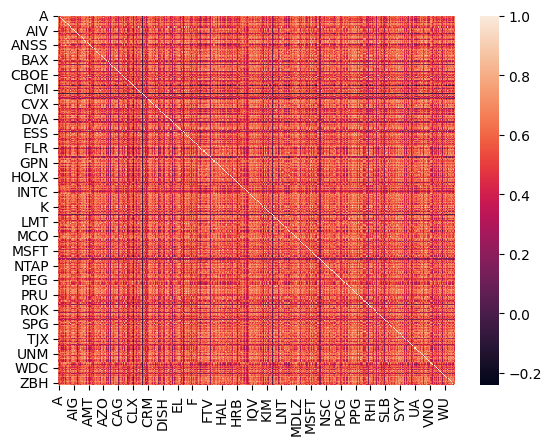

In [7]:
# 可视化相关性系数矩阵
sns.heatmap(corr)
plt.savefig('相关性系数矩阵.png')

In [8]:
# 将相关性系数矩阵转换为邻接矩阵
A = corr.copy()

# 设定阈值
threshold = 0.8

# 低于阈值，置0
A[A < threshold] = 0

# 超过阈值，置1
A[A >= threshold] = 1
A

,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBV,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
YUM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ZBH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ZION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
A = A - np.identity(len(A))
# 将对角线元素置0，不画自环
A

,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YUM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZBH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


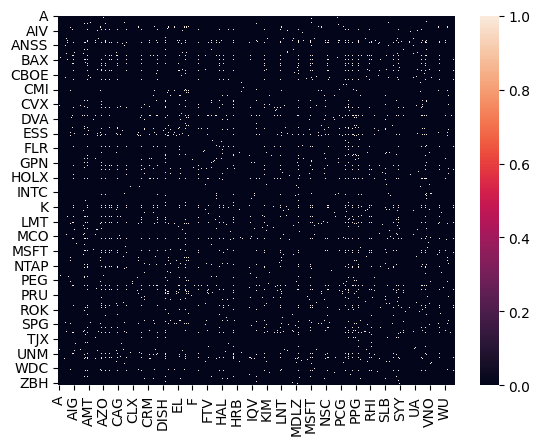

In [10]:
# 可视化邻接矩阵
sns.heatmap(A)
plt.savefig('邻接矩阵.png')

In [11]:
# 创建图
G = nx.from_numpy_array(A.to_numpy()) 

# 修改节点名称
G = nx.relabel_nodes(G, dict(enumerate(A.columns)))

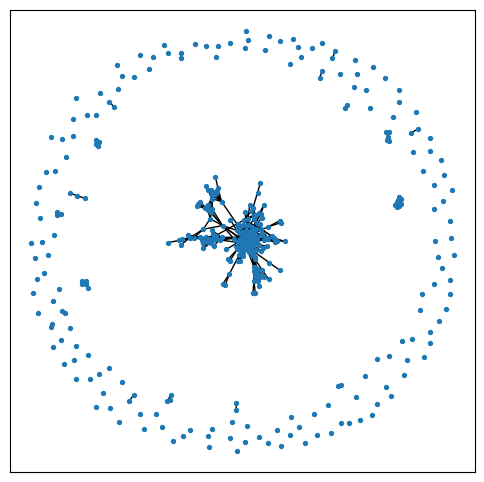

In [12]:
# 可视化图
pos = nx.spring_layout(G, seed = 8)

plt.figure(figsize = (6,6))
nx.draw_networkx(G,pos = pos,
                 with_labels = False,
                 node_size = 8) 
plt.savefig('图.png')

In [13]:
# 最大连通分量
Gcc = G.subgraph(sorted(nx.connected_components(G), 
                        key=len, reverse=True)[0])

In [14]:
pos_Gcc = {k: pos[k] for k in list(Gcc.nodes())}
# 取出子图节点坐标

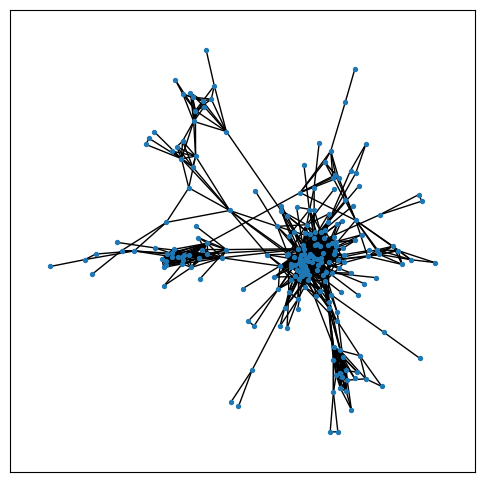

In [15]:
plt.figure(figsize = (6,6))
nx.draw_networkx(Gcc, pos_Gcc, 
                 with_labels = False,
                 node_size=8)
plt.savefig('最大连通分量子图.svg')

In [16]:
# 划分社区
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

In [17]:
print(len(node_groups))

168


In [18]:
# node_groups

In [19]:
# 按子列表长度排列
node_groups.sort(key=len, reverse = True)

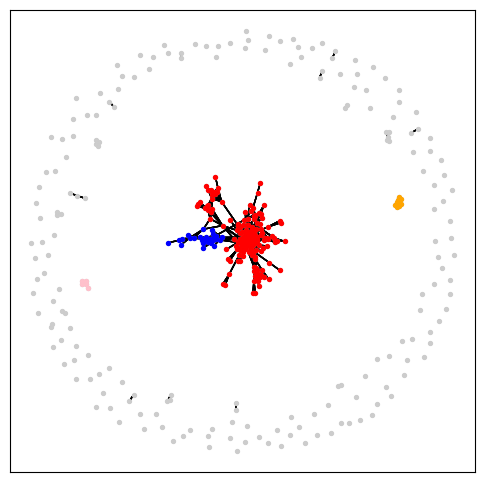

In [20]:
plt.figure(figsize = (6,6))

nx.draw_networkx(G,pos = pos,
                 node_color = '0.8',
                 with_labels = False,
                 node_size = 8) 

# 排名前4个社区
list_colors = ['r', 'b', 'orange', 'pink']

for idx,color_i in enumerate(list_colors):
    nx.draw_networkx(G,pos = pos, nodelist = node_groups[idx],
                     node_color = color_i,
                     with_labels = False,
                     node_size = 8) 

plt.savefig('社区.png')